# Introduction and Project Scope

It is difficult to determine the authenticity of an Instagram account with complete certainty. However, it is possible to build a model that can predict the likelihood that an Instagram account is fake, based on certain characteristics of the account and its activity.

Some possible characteristics that could be used as input features for a fake Instagram account detection model include:

1. The number of followers the account has
2. The ratio of followers to following
3. The age of the account
4. The amount of activity on the account (e.g. number of posts, comments, likes)
5. The type of content that is posted
6. The use of hashtags
7. The presence of a profile picture and biography
8. The use of third-party apps to boost the account's activity

Using these and other relevant features, it is possible to train a machine learning model to predict the likelihood that an Instagram account is fake.However, it is important to note that building an accurate fake Instagram account detection model would likely require a large and diverse dataset of real and fake accounts, as well as careful feature engineering and model selection. It would also be important to continuously update the model as fake accounts evolve and change over time.

# Importing Libraries and Datasets

In [110]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/instagram-fake-spammer-genuine-accounts/train.csv
/kaggle/input/instagram-fake-spammer-genuine-accounts/test.csv


In [111]:
import warnings

warnings.filterwarnings("ignore")


def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=DeprecationWarning)
    fxn()


In [112]:
# Load the training dataset
instagram_df_train=pd.read_csv('/kaggle/input/instagram-fake-spammer-genuine-accounts/train.csv')
instagram_df_train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.00,0,0,0,1,13,159,98,0
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0
4,1,0.00,2,0.00,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1


In [113]:
# Load the testing data
instagram_df_test=pd.read_csv('/kaggle/input/instagram-fake-spammer-genuine-accounts/test.csv')
instagram_df_test

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0
...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811,1
116,1,0.40,1,0.00,0,0,0,0,4,150,164,1
117,1,0.00,2,0.00,0,0,0,0,3,833,3572,1
118,0,0.17,1,0.00,0,0,0,0,1,219,1695,1


# Statistical Analysis

In [114]:
instagram_df_train.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [115]:
instagram_df_train.tail()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1
575,1,0.27,1,0.00,0,0,0,0,2,150,487,1


In [116]:
# Getting dataframe info
instagram_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [117]:
# Get the statistical summary of the dataframe
instagram_df_train.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


In [118]:
# Checking if null values exist
instagram_df_train.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [119]:
# Get the number of unique values in the "profile pic" feature
instagram_df_train['profile pic'].value_counts()

1    404
0    172
Name: profile pic, dtype: int64

In [120]:
# Get the number of unique values in "fake" (Target column)
instagram_df_train['fake'].value_counts()

0    288
1    288
Name: fake, dtype: int64

# Data Visualization

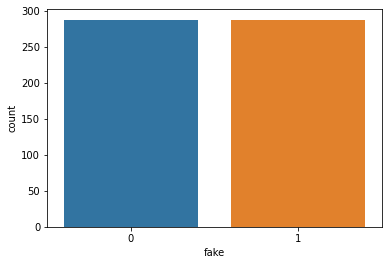

In [121]:
# Visualize the data
sns.countplot(instagram_df_train['fake'])
plt.show()

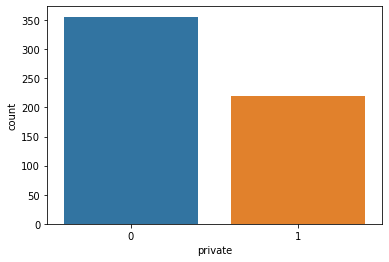

In [122]:
# Visualize the private column data
sns.countplot(instagram_df_train['private'])
plt.show()

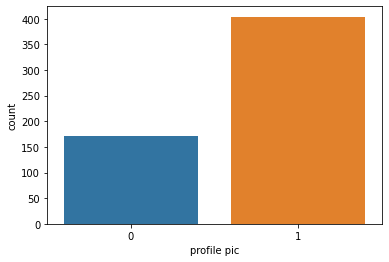

In [123]:
# Visualize the "profile pic" column data
sns.countplot(instagram_df_train['profile pic'])
plt.show()

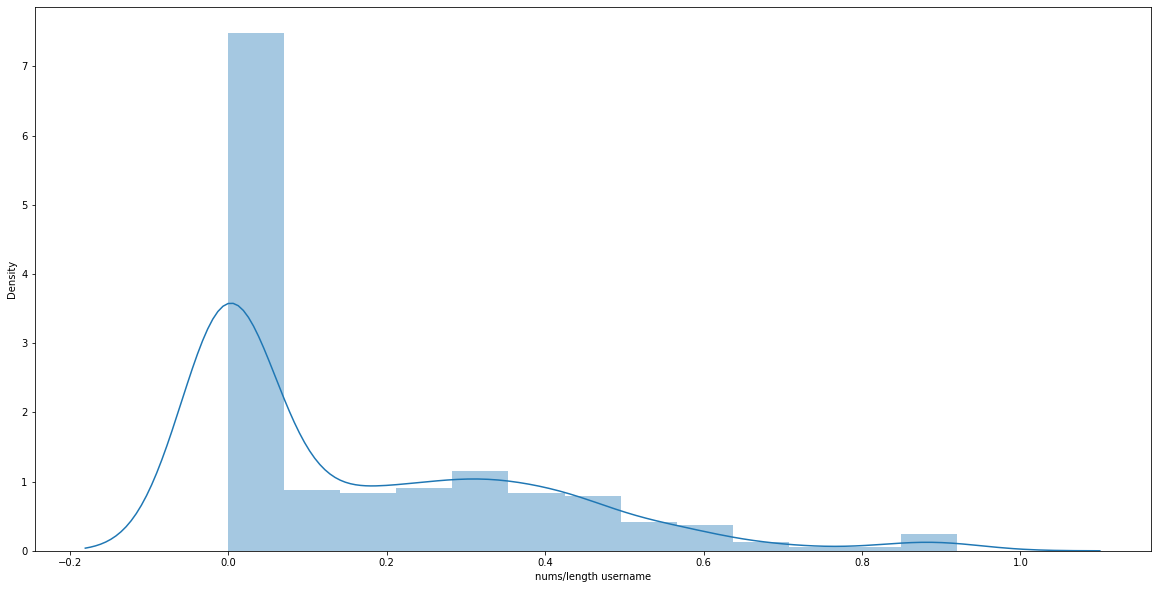

In [124]:
# Visualize the data
plt.figure(figsize = (20, 10))
sns.distplot(instagram_df_train['nums/length username'])
plt.show()

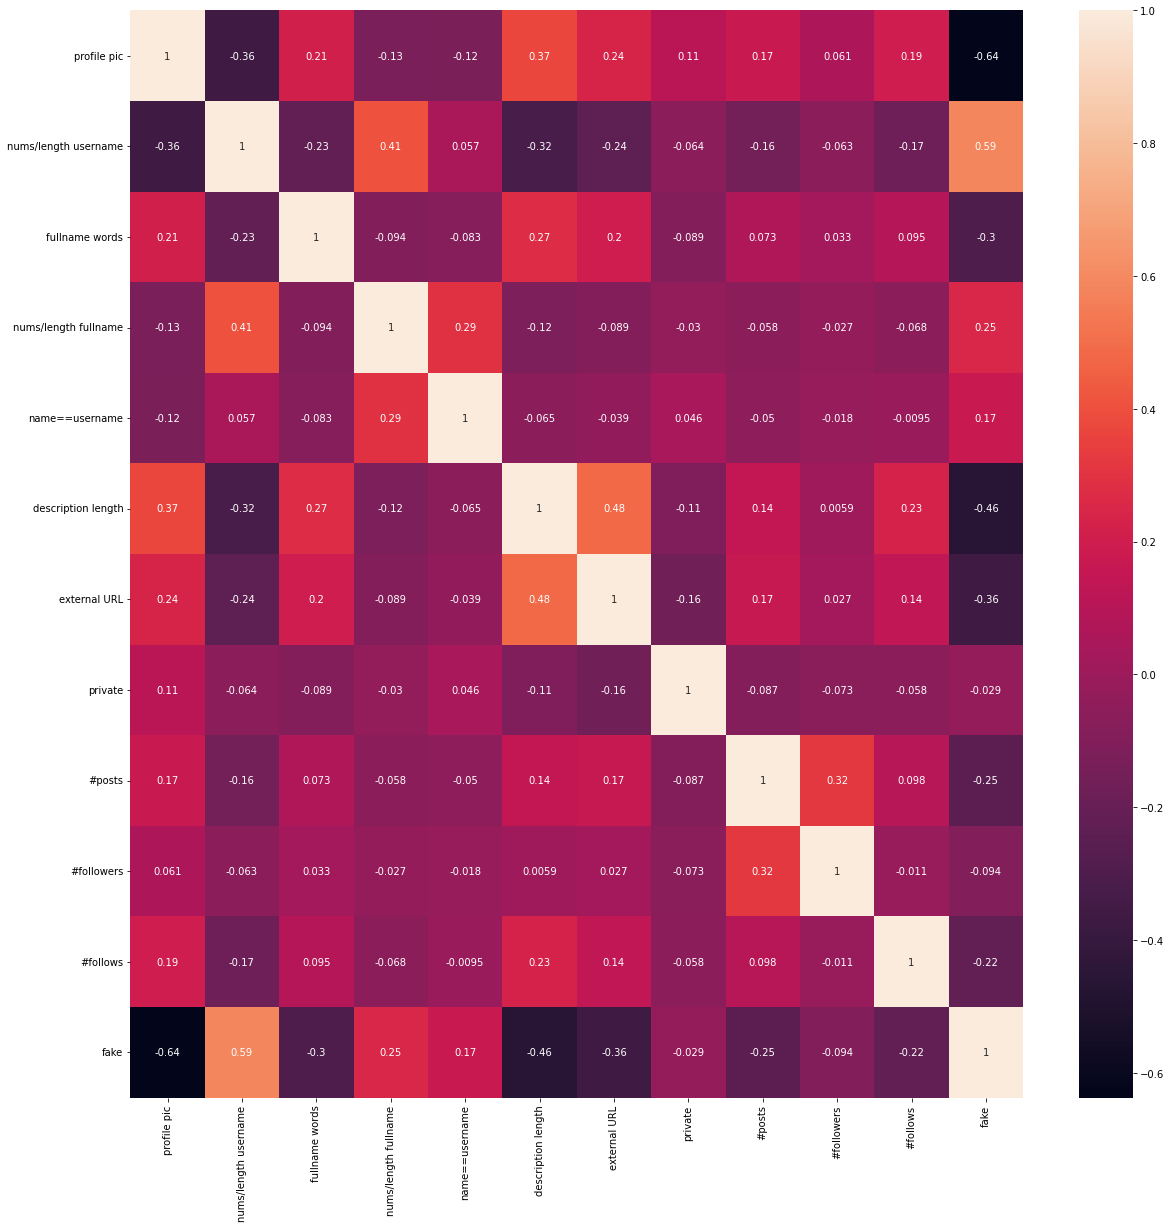

In [125]:
# Correlation plot
plt.figure(figsize=(20, 20))
cm = instagram_df_train.corr()
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)
plt.show()

# Data Modelling

In [126]:
# Training and testing dataset (inputs)
X_train = instagram_df_train.drop(columns = ['fake'])
X_test = instagram_df_test.drop(columns = ['fake'])
X_train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.27,0,0.00,0,53,0,0,32,1000,955
1,1,0.00,2,0.00,0,44,0,0,286,2740,533
2,1,0.10,2,0.00,0,0,0,1,13,159,98
3,1,0.00,1,0.00,0,82,0,0,679,414,651
4,1,0.00,2,0.00,0,0,0,1,6,151,126
...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596
572,1,0.38,1,0.33,0,21,0,0,44,66,75
573,1,0.57,2,0.00,0,0,0,0,4,96,339
574,1,0.57,1,0.00,0,11,0,0,0,57,73


In [127]:
# Training and testing dataset (Outputs)
y_train = instagram_df_train['fake']
y_test = instagram_df_test['fake']
y_train

0      0
1      0
2      0
3      0
4      0
      ..
571    1
572    1
573    1
574    1
575    1
Name: fake, Length: 576, dtype: int64

In [128]:
# Scale the data before training the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

In [129]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes = 2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 2)

In [130]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [131]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(50, input_dim=11, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2,activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 50)                600       
_________________________________________________________________
dense_16 (Dense)             (None, 150)               7650      
_________________________________________________________________
dropout_9 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 150)               22650     
_________________________________________________________________
dropout_10 (Dropout)         (None, 150)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 25)                3775      
_________________________________________________________________
dropout_11 (Dropout)         (None, 25)               

In [132]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [133]:
epochs_hist = model.fit(X_train, y_train, epochs = 50,  verbose = 1, validation_split = 0.1)

Epoch 1/50
17/17 [==============================] - 1s 17ms/step - loss: 0.6231 - accuracy: 0.6795 - val_loss: 0.4977 - val_accuracy: 0.8103
Epoch 2/50
17/17 [==============================] - 0s 6ms/step - loss: 0.4318 - accuracy: 0.8456 - val_loss: 0.2731 - val_accuracy: 0.8793
Epoch 3/50
17/17 [==============================] - 0s 6ms/step - loss: 0.3206 - accuracy: 0.8900 - val_loss: 0.1951 - val_accuracy: 0.9138
Epoch 4/50
17/17 [==============================] - 0s 6ms/step - loss: 0.2412 - accuracy: 0.9093 - val_loss: 0.1942 - val_accuracy: 0.9138
Epoch 5/50
17/17 [==============================] - 0s 5ms/step - loss: 0.2481 - accuracy: 0.9093 - val_loss: 0.2270 - val_accuracy: 0.8966
Epoch 6/50
17/17 [==============================] - 0s 5ms/step - loss: 0.2383 - accuracy: 0.9093 - val_loss: 0.1622 - val_accuracy: 0.9138
Epoch 7/50
17/17 [==============================] - 0s 5ms/step - loss: 0.2362 - accuracy: 0.9131 - val_loss: 0.2056 - val_accuracy: 0.8966
Epoch 8/50
17/17 [=

# Model Validation and Results

In [134]:
print(epochs_hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


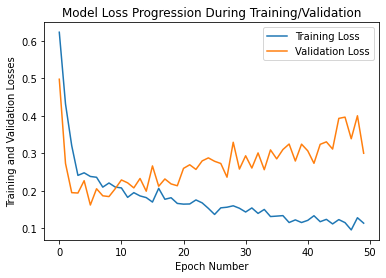

In [135]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

In [136]:
predicted = model.predict(X_test)

In [137]:
predicted_value = []
test = []
for i in predicted:
    predicted_value.append(np.argmax(i))
    
for i in y_test:
    test.append(np.argmax(i))

In [138]:
print(classification_report(test, predicted_value))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89        60
           1       0.89      0.90      0.89        60

    accuracy                           0.89       120
   macro avg       0.89      0.89      0.89       120
weighted avg       0.89      0.89      0.89       120



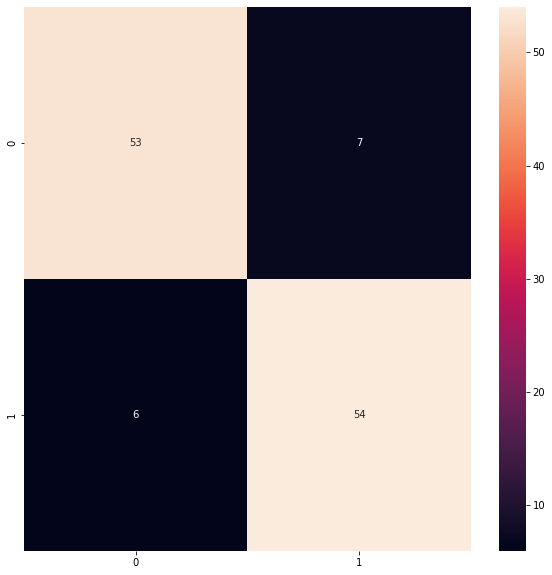

In [139]:
plt.figure(figsize=(10, 10))
cm=confusion_matrix(test, predicted_value)
sns.heatmap(cm, annot=True)
plt.show()

# Solution using LightGBM

In [140]:
import lightgbm as lgb
import optuna
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler

In [141]:
# Define feature columns
feature_cols = ['profile pic', 'nums/length username', 'fullname words', 
                'nums/length fullname', 'name==username', 'description length',
                'external URL', 'private', '#posts', '#followers', '#follows']

# Separate features and target
X = instagram_df_train[feature_cols]
y = instagram_df_train['fake']

# Identify columns to scale
scale_cols = ['nums/length username', 'nums/length fullname']

# Apply scaling only to numerical columns
scaler = StandardScaler()
X[scale_cols] = scaler.fit_transform(X[scale_cols])

# Split data into train & validation sets for hyperparameter tuning
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [142]:
def objective(trial):
    """Optuna objective function for LGBM hyperparameter tuning"""
    
    param_grid = {
        'objective': 'binary',
        'metric': 'binary_logloss',  # Use binary log loss as an evaluation metric
        'boosting_type': 'gbdt',
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 10.0),
    }
    
    model = lgb.LGBMClassifier(**param_grid)

    # Fit with early stopping
    model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        eval_metric='binary_logloss',
        early_stopping_rounds=50,
        verbose=False
    )
    
    # Make predictions
    y_pred = model.predict(X_val)

    # Return F1-score (you can use accuracy instead)
    return f1_score(y_val, y_pred)

In [143]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Get best parameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

[I 2025-03-19 18:24:17,039] A new study created in memory with name: no-name-ed780c41-ffbb-4088-bf68-e8c51df7b12a
[I 2025-03-19 18:24:17,295] Trial 0 finished with value: 0.9298245614035087 and parameters: {'num_leaves': 71, 'max_depth': 7, 'learning_rate': 0.005081836866813394, 'n_estimators': 440, 'min_child_samples': 21, 'subsample': 0.9874713620812832, 'colsample_bytree': 0.6820196518210168, 'reg_alpha': 7.548678573864737e-06, 'reg_lambda': 4.167272603664346e-06}. Best is trial 0 with value: 0.9298245614035087.
[I 2025-03-19 18:24:17,363] Trial 1 finished with value: 0.923076923076923 and parameters: {'num_leaves': 73, 'max_depth': 8, 'learning_rate': 0.00793166652967166, 'n_estimators': 242, 'min_child_samples': 66, 'subsample': 0.7355546060159583, 'colsample_bytree': 0.5933055259084961, 'reg_alpha': 1.507488185872253e-08, 'reg_lambda': 0.0033487077549314423}. Best is trial 0 with value: 0.9298245614035087.
[I 2025-03-19 18:24:17,419] Trial 2 finished with value: 0.939130434782608

Best Hyperparameters: {'num_leaves': 47, 'max_depth': 11, 'learning_rate': 0.097666934865735, 'n_estimators': 546, 'min_child_samples': 38, 'subsample': 0.8188397262172287, 'colsample_bytree': 0.8266968702124202, 'reg_alpha': 0.013779987980375994, 'reg_lambda': 2.4724636068968352e-08}


In [144]:
# Train model with best parameters
best_model = lgb.LGBMClassifier(**best_params)
best_model.fit(X_train, y_train)

# Predict on validation set
y_val_pred = best_model.predict(X_val)

# Compute evaluation metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

# Print results
print("\nOptimized Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Optimized Model Performance:
Accuracy: 0.9397
Precision: 0.9322
Recall: 0.9483
F1 Score: 0.9402


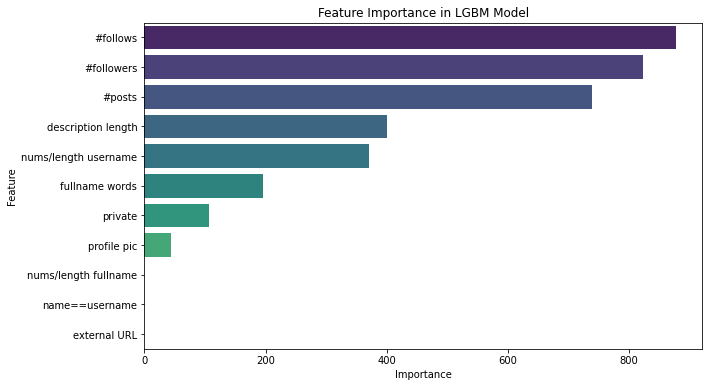

In [145]:
# Get feature importance
importance_df = pd.DataFrame({'Feature': feature_cols, 'Importance': best_model.feature_importances_})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")
plt.title("Feature Importance in LGBM Model")
plt.show()